# Connecting Python Pandas And Jupyter Notebooks To PostgreSQL For Data Analysis

https://blog.panoply.io/connecting-jupyter-notebook-with-postgresql-for-python-data-analysis

In [1]:
import pandas as pd
import psycopg2
import sqlalchemy
import matplotlib as plt

%matplotlib inline

In [2]:
from sqlalchemy import create_engine

POSTGRES_ADDRESS = 'postgres'
POSTGRES_PORT = '5432'
POSTGEES_USERNAME = 'shared'
POSTGRES_PASSWORD = '6team123!'
POSTGRES_DBNAME = 'shared'

postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
               .format(username=POSTGRES_ADDRESS,
                      password=POSTGRES_PASSWORD,
                       ipaddress=POSTGRES_ADDRESS,
                       port=POSTGRES_PORT,
                       dbname=POSTGRES_DBNAME ))

cnx = create_engine(postgres_str)

In [3]:
pd.read_sql_query('''SELECT * FROM EMP''', cnx)

empno   ename        job     mgr    hiredate   sal    comm  deptno
0    7369   SMITH      CLERK  7902.0  1980-12-17   800     NaN      20
1    7499   ALLEN   SALESMAN  7698.0  1981-02-20  1600   300.0      30
2    7521    WARD   SALESMAN  7698.0  1981-02-22  1250   500.0      30
3    7566   JONES    MANAGER  7839.0  1981-04-02  2975     NaN      20
4    7654  MARTIN   SALESMAN  7698.0  1981-09-28  1250  1400.0      30
5    7698   BLAKE    MANAGER  7839.0  1981-05-01  2850     NaN      30
6    7782   CLARK    MANAGER  7839.0  1981-06-09  2450     NaN      10
7    7788   SCOTT    ANALYST  7566.0  1987-04-19  3000     NaN      20
8    7839    KING  PRESIDENT     NaN  1981-11-17  5000     NaN      10
9    7844  TURNER   SALESMAN  7698.0  1981-09-08  1500     0.0      30
10   7876   ADAMS      CLERK  7788.0  1987-05-23  1100     NaN      20
11   7900   JAMES      CLERK  7698.0  1981-12-03   950     NaN      30
12   7902    FORD    ANALYST  7566.0  1981-12-03  3000     NaN      20
13   7934  MILLER      CLERK  7782.0  1982-01-23  1300     NaN      10

In [8]:
emp_df = pd.read_sql_query('''SELECT * FROM EMP LIMIT 5;''', cnx)

In [9]:
emp_df.head()

empno   ename       job   mgr    hiredate   sal    comm  deptno
0   7369   SMITH     CLERK  7902  1980-12-17   800     NaN      20
1   7499   ALLEN  SALESMAN  7698  1981-02-20  1600   300.0      30
2   7521    WARD  SALESMAN  7698  1981-02-22  1250   500.0      30
3   7566   JONES   MANAGER  7839  1981-04-02  2975     NaN      20
4   7654  MARTIN  SALESMAN  7698  1981-09-28  1250  1400.0      30

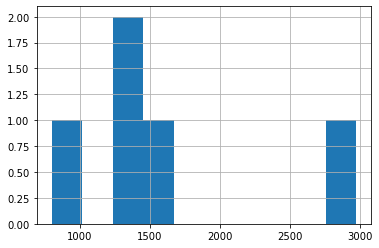

In [10]:
emp_df.sal.hist()

In [11]:
dept_df = pd.read_sql_query('''SELECT * FROM dept;''', cnx)

In [12]:
dept_df.head()

deptno       dname       loc
0      10  ACCOUNTING  NEW YORK
1      20    RESEARCH    DALLAS
2      30       SALES   CHICAGO
3      40  OPERATIONS    BOSTON

In [17]:
pd.read_sql_query('''SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND 
    schemaname != 'information_schema';''', cnx)

schemaname   tablename tableowner tablespace  hasindexes  hasrules  \
0     public  passengers     shared       None        True     False   
1     public      sample     shared       None       False     False   
2     public        dept     shared       None        True     False   
3     public         emp     shared       None        True     False   
4     public        demo     shared       None       False     False   

   hastriggers  rowsecurity  
0        False        False  
1        False        False  
2         True        False  
3         True        False  
4        False        False

In [21]:
passengers = pd.read_sql_query('''SELECT * FROM passengers;''', cnx)

In [22]:
passengers.head()

index  Survived  Pclass                                               Name  \
0      0         0       3                             Mr. Owen Harris Braund   
1      1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2      2         1       3                              Miss. Laina Heikkinen   
3      3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4      4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500

In [24]:
passengers = (passengers.rename(columns=str.lower))

In [25]:
passengers

index  survived  pclass  \
0        0         0       3   
1        1         1       1   
2        2         1       3   
3        3         1       1   
4        4         0       3   
..     ...       ...     ...   
882    882         0       2   
883    883         1       1   
884    884         0       3   
885    885         1       1   
886    886         0       3   

                                                  name     sex   age  \
0                               Mr. Owen Harris Braund    male  22.0   
1    Mrs. John Bradley (Florence Briggs Thayer) Cum...  female  38.0   
2                                Miss. Laina Heikkinen  female  26.0   
3          Mrs. Jacques Heath (Lily May Peel) Futrelle  female  35.0   
4                              Mr. William Henry Allen    male  35.0   
..                                                 ...     ...   ...   
882                               Rev. Juozas Montvila    male  27.0   
883                        Miss. Margaret Edith Graham  female  19.0   
884                     Miss. Catherine Helen Johnston  female   7.0   
885                               Mr. Karl Howell Behr    male  26.0   
886                                 Mr. Patrick Dooley    male  32.0   

     siblings/spouses aboard  parents/children aboard     fare  
0                          1                        0   7.2500  
1                          1                        0  71.2833  
2                          0                        0   7.9250  
3                          1                        0  53.1000  
4                          0                        0   8.0500  
..                       ...                      ...      ...  
882                        0                        0  13.0000  
883                        0                        0  30.0000  
884                        1                        2  23.4500  
885                        0                        0  30.0000  
886                        0                        0   7.7500  

[887 rows x 9 columns]

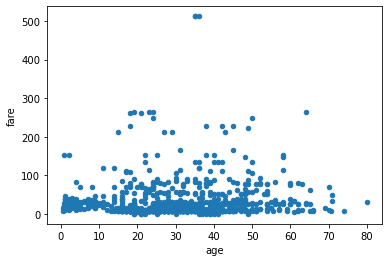

In [27]:
passengers.plot.scatter(x='age', y='fare')